In [18]:
library(tidyverse)
library(readr)
library(dplyr)

In [19]:
players <- read_csv("data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**(1) Data Description**

In [7]:
#PLAYERS SUMMARY STATISTICS
players_summary <- summary(players)
players_summary

players_mean <- players |>
    summarize(avg_played_hours = mean(played_hours),
             avg_age = mean(Age, na.rm = TRUE))
players_mean <- round(players_mean, 2)
players_mean

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

avg_played_hours,avg_age
<dbl>,<dbl>
5.85,21.14


Players (players.csv):

* 196 observations
* 7 variables
  * *experience*: a **character** variable that indicates the player's experience: beginner, amateur, regular, pro, or veteran
  * *subscribe*: a **character** variable that indicates whether the player is subscribed to a game-related newsletter (true or false)
  * *hashedEmail*: a **character** variable that reports a player's hashed email address
  * *played_hours*: a **double** variable that shows the number of hours each individual played
  * *name*: a **character** variable that shows the player's name
  * *gender*: a **character** variable that shows the player's gender
  * *Age*: a **double** variable that shows the player's age

**(2) Question**

Broad: what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific: Can a game player's experience and the amount of time they play predict if they will subscribe to a game-related newsletter?

how data will help address the question...

**(3) Exploratory data analysis and visualization**

In [8]:
# loading data
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [21]:
# wrangling
players_tidy <- players |>
    select(experience, subscribe, played_hours) |>
    mutate(experience = as_factor(experience)) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not subscribed" = "FALSE"))
players_tidy

experience,subscribe,played_hours
<fct>,<fct>,<dbl>
Pro,Subscribed,30.3
Veteran,Subscribed,3.8
Veteran,Not subscribed,0.0
Amateur,Subscribed,0.7
Regular,Subscribed,0.1
Amateur,Subscribed,0.0
Regular,Subscribed,0.0
Amateur,Not subscribed,0.0
Amateur,Subscribed,0.1


In [13]:
# mean for each quantitative variable in players.csv
players_avg <- players |>
    summarize(avg_played_hours = mean(played_hours),
              avg_Age = mean(Age, na.rm = TRUE))
players_avg

avg_played_hours,avg_Age
<dbl>,<dbl>
5.845918,21.13918


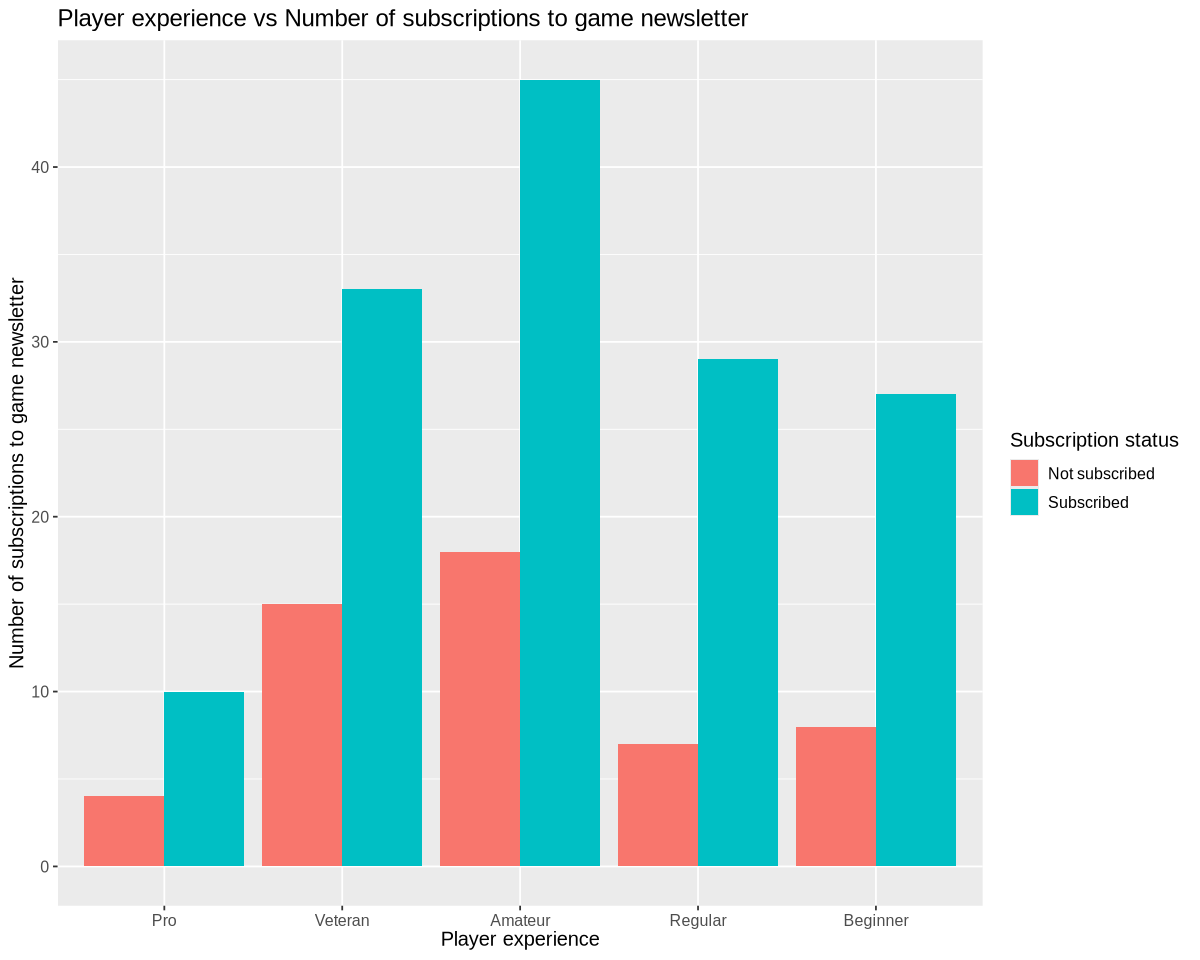

In [34]:
# visualizations
options(repr.plot.width = 10, repr.plot.height = 8)

experience_v_sub <- players_tidy |>
    ggplot(aes(x = experience, fill = subscribe)) +
        geom_bar(position = "dodge") +
        labs(x = "Player experience",
             y = "Number of subscriptions to game newsletter",
             title = "Player experience vs Number of subscriptions to game newsletter",
             fill = "Subscription status") +
        theme(text = element_text(size = 12))
experience_v_sub

**(4) Methods and plan**

**(5) GitHub repository**

https://github.com/nliu0729/dsci_100_project.git